In [105]:
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv("crime_data.csv")#, sep=';')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [107]:
#Renaming the unnammed column:
df.rename(columns={'Unnamed: 0':'places'}, inplace=True)

In [108]:
df.head()

,places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [109]:
df.shape

(50, 5)

there are 50 rows and 5 columns present in the data.

In [110]:
#Descriptive statistics of the dataset:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


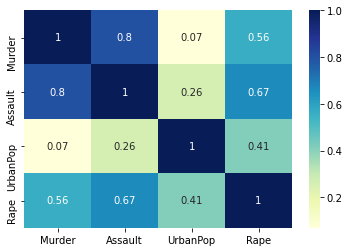

In [111]:
#Checking the correlation between the features:
import seaborn as sns
corr_plot = sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

All of the variables seem to have a weak to strong positive correlation.
While Murder and Assault are very strongly correlated with each other 
secondly, Assault and Rape are moderately correlated with each other.

In [112]:
#Checking the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [113]:
#Checking for any missing values:
df.isnull().sum()

places      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200922B4730>,
      dtype=object)

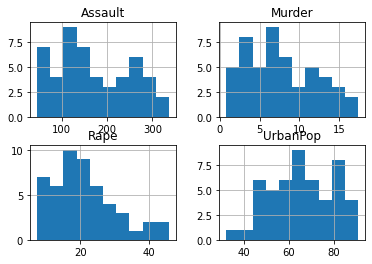

In [114]:
df.hist()

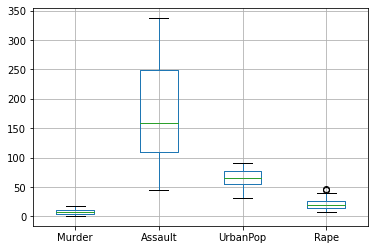

In [115]:
#Checking for any outliers:
df.boxplot()

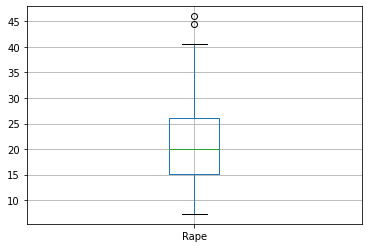

In [116]:
df.boxplot(column=['Rape'])

There are two ouliers present in the rape variable.

In [88]:
df.drop(['places'], axis =1, inplace=True)

In [90]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [117]:
#Normalizing the heterogenous data:
from sklearn.preprocessing import StandardScaler

In [125]:
df_norm = df.iloc[:,1:]

In [126]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [128]:
df_norm = StandardScaler().fit_transform(df_norm)
df_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

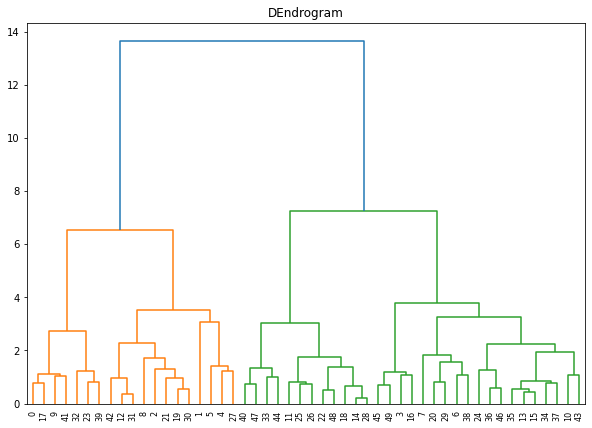

In [129]:
#Hierarchical clustering:
#First to plot dendrogram:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("DEndrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))

The vertical blue line is with a maximum distance and we decide a threshold of 8 to cut the dendrogram.

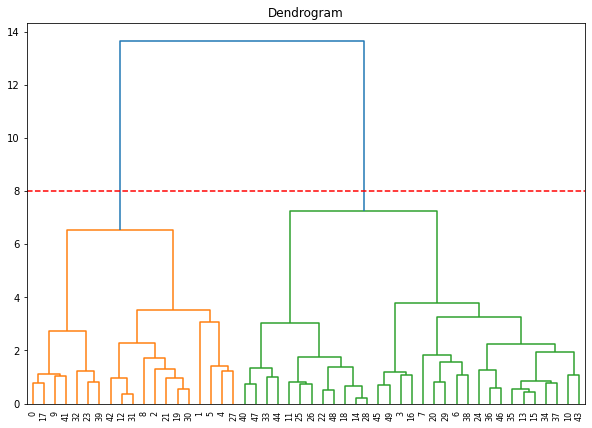

In [130]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.axhline(y=8, color='r',linestyle='--')

In [131]:
#Hierarchical clustering to be applied for the above 2 clusters:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(df_norm)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [132]:
df['h_clusterid']=cluster.labels_

In [133]:
df

,places,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


Thus, we have got the 2 clusters in the crime dataset.

In [134]:
#DBSCAN:
from sklearn.cluster import DBSCAN

In [141]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(df_norm)

DBSCAN(eps=1)

In [142]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [143]:
#Adding the clusters to the dataset:
dbscan_df = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [144]:
dbscan_df.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [147]:
dbscan_df = pd.concat([df,dbscan_df],axis=1)

In [150]:
dbscan_df.head()

,places,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster
0,Alabama,13.2,236,58,21.2,1,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,0,-1
4,California,9.0,276,91,40.6,1,-1


In [151]:
dbscan_df.groupby('cluster').aggregate(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,-1,11.152174,236.913043,66.739130,27.034783,0.826087
1,0,4.904167,108.625000,61.708333,16.516667,0.000000
2,1,5.066667,160.666667,87.000000,14.466667,0.000000


The above shows the 3 clusters along with the mean rates.

In [152]:
#KMEANS clustering:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
#plotting the elbow curve to determine k:
